<a href="https://colab.research.google.com/github/jhno-code/2020-2/blob/main/Guia_2_Taxonomia_de_Flynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguiente código va a permitir que todo código ejecutado en el colab pueda ser medido

In [ ]:
!pip install ipython-autotime
!pip install pyro-ppl

%load_ext autotime
%reload_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 125 µs


In [ ]:
print(sum(range(10)))

45
time: 880 µs


Pregunta #1: Que porción de 1 segundo es el valor impreso? </br>
880 µs equivale a 880 microsegundos


---



A seguir, tenemos una librería de Python llamado **numba** que realiza paralelización automatica. Asi, se puede verificar que al usar prange() se tiene mejor tiempo de ejecución que al usar range()

In [ ]:
from numba import njit, prange
import numpy as np

A = np.arange(1, 14000000)
@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in prange(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))

97999993000000
time: 345 ms


In [ ]:
from numba import njit, prange

A = np.arange(1, 14000000)
#@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in range(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))



97999993000000
time: 3.55 s


Pregunta #2: identifique otros valores en A, de manera que, serializando, tengamos mejor resultado que paralelizando <br>
*** Para una cantidad de valores de A menor a 1000000 aproximadamente se tienen mejores resultados serializando que paralelizando



---



La Taxonomia de Flynn define 4 tipos de arquitecturas para computación paralela: SISD, SIMD, MISD, y MIMD.
---
Pregunta #3 : El ultimo código ejecutado es de tipo?
--
*** Del tipo SISD



---



Pregunta #4: el siguiente código paralelo es de tipo? Comentar el código para justificar su respuesta

In [ ]:
# Importar librerias
import threading
import time

# Funcion imprime hilo y tiempo
def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

# Crear hilos
t1 = threading.Thread(target=print_time, args=("Thread-1", 0, ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", 0, ) )
# Iniciar hilos
t1.start()
t2.start()

Para el Hilo: Thread-1, en el momento: Wed Dec  9 15:27:42 2020, su valor de count es: 0
Thread-1: Wed Dec  9 15:27:42 2020. count 1
Thread-1: Wed Dec  9 15:27:42 2020. count 2
Thread-1: Wed Dec  9 15:27:42 2020. count 3
Thread-1: Wed Dec  9 15:27:42 2020. count 4
Thread-1: Wed Dec  9 15:27:42 2020. count 5
Para el Hilo: Thread-2, en el momento: Wed Dec  9 15:27:42 2020, su valor de count es: 0time: 12.9 ms

Thread-2: Wed Dec  9 15:27:42 2020. count 1
Thread-2: Wed Dec  9 15:27:42 2020. count 2
Thread-2: Wed Dec  9 15:27:42 2020. count 3
Thread-2: Wed Dec  9 15:27:42 2020. count 4
Thread-2: Wed Dec  9 15:27:42 2020. count 5


El código anterior es SIMD ya que solo se tiene una instruccion "prin_time()" y múltiples datos "thread-1" y "thread-2"



---



Una computadora paralela tipo MIMD es utilizado más en la computación distribuida, ejm. Clusters. El siguiente código en python desktop muestra tal funcionamiento

In [ ]:
#greeting-server.py
import Pyro4

@Pyro4.expose
class GreetingMaker(object):
    def get_fortune(self, name):
        return "Hello, {0}. Here is your fortune message:\n" \
               "Behold the warranty -- the bold print giveth and the fine print taketh away.".format(name)

daemon = Pyro4.Daemon()                # make a Pyro daemon
uri = daemon.register(GreetingMaker)   # register the greeting maker as a Pyro object

print("Ready. Object uri =", uri)      # print the uri so we can use it in the client later
daemon.requestLoop()                   # start the event loop of the server to wait for calls

In [ ]:
#greeting-client.py
import Pyro4

uri = input("What is the Pyro uri of the greeting object? ").strip()
name = input("What is your name? ").strip()

greeting_maker = Pyro4.Proxy(uri)         # get a Pyro proxy to the greeting object
print(greeting_maker.get_fortune(name))   # call method normally

Pregunta #5: Explique que hace este código de tipo MIMD

**greeting-client.py**<br>
Tiene una clase GreetingMaker que se utilizará para mostrar el saludo junto a un nombre que será dado por el usuario.<br>
Al correr *greeting-client.py* mostrará una direccion única que se usará en el cliente<br>
**greeting-client.py**<br>
Pide una direccion(única) al usuario<br>
Pregunta el nombre del usuario<br>
Con la direccion única accede al servidor para obtener la clase greetingMaker<br>
Imprime el mensaje de saludo llamando al método get_fortune() dandole el nombre antes pedido<br>

Se tienen dos datos: *nombre del usuario* y *direccion del servidor*<br>
Se tienen instrucciones: *Mostrar saludo*, *conectarse al servidor*

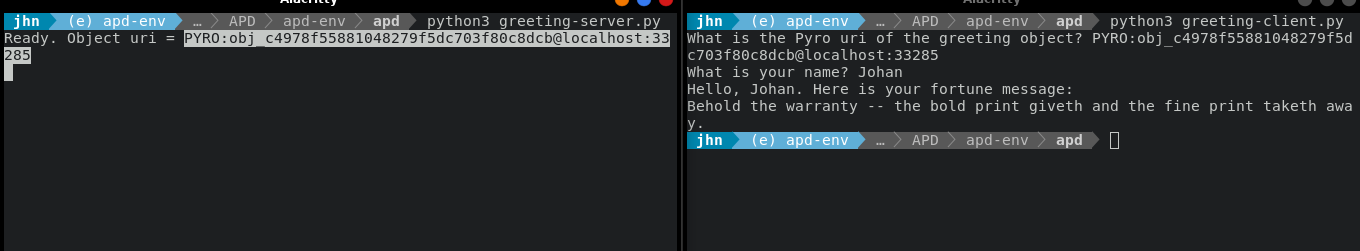

---



Ejercicio Propuesto: Crear un ejemplo que muestre una computación paralela de tipo MISD

**Referencias**

https://wiki.python.org/moin/ParallelProcessing

https://numba.readthedocs.io/en/stable/user/parallel.html

https://ao.gl/how-to-measure-execution-time-in-google-colab/

http://noisymime.org/blogimages/SIMD.pdf